In [1]:
import pandas as pd
import numpy as np
import os
import csv
import sys
import swifter

csv.field_size_limit(100000000)

131072

# Importing Dataset from Kaggle, FakeNewsCorpus and Liar Dataset

In [2]:
kaggle_csv = pd.read_csv('./work/Datasets/Combined_Dataset/combined_data.csv')
kaggle_csv

,url,title,content,label,domain
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,reliable,bbc.com
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",reliable,reuters.com
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,reliable,nytimes.com
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,reliable,reuters.com
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",reliable,cnn.com
...,...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,fake,beforeitsnews.com
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,fake,beforeitsnews.com
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,fake,activistpost.com
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,reliable,reuters.com


In [3]:
liar_csv = pd.read_csv('./work/Datasets/Combined_Dataset/truncated_liar_dataset.csv')
liar_csv.columns=['label', 'content', 'author']

liar_csv

,label,content,author
0,fake,Says the Annies List political group supports ...,dwayne-bohac
1,fake,When did the decline of coal start? It started...,scott-surovell
2,reliable,"Hillary Clinton agrees with John McCain ""by vo...",barack-obama
3,fake,Health care reform legislation is likely to ma...,blog-posting
4,fake,The economic turnaround started at the end of ...,charlie-crist
...,...,...,...
10235,reliable,There are a larger number of shark attacks in ...,aclu-florida
10236,reliable,Democrats have now become the party of the [At...,alan-powell
10237,fake,Says an alternative to Social Security that op...,herman-cain
10238,fake,On lifting the U.S. Cuban embargo and allowing...,jeff-greene


In [4]:
combined_df = pd.concat([liar_csv, kaggle_csv])
combined_df

,label,content,author,url,title,domain
0,fake,Says the Annies List political group supports ...,dwayne-bohac,NaN,NaN,NaN
1,fake,When did the decline of coal start? It started...,scott-surovell,NaN,NaN,NaN
2,reliable,"Hillary Clinton agrees with John McCain ""by vo...",barack-obama,NaN,NaN,NaN
3,fake,Health care reform legislation is likely to ma...,blog-posting,NaN,NaN,NaN
4,fake,The economic turnaround started at the end of ...,charlie-crist,NaN,NaN,NaN
...,...,...,...,...,...,...
4004,fake,Trends to Watch\n% of readers think this story...,NaN,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,beforeitsnews.com
4005,fake,Trump Jr. Is Soon To Give A 30-Minute Speech F...,NaN,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,beforeitsnews.com
4006,fake,NaN,NaN,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",activistpost.com
4007,reliable,SHANGHAI (Reuters) - China said it plans to ac...,NaN,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,reuters.com


In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import re

ps = PorterStemmer()

def clean_content(text):
    text = re.sub(r"http\S+", "", text)

    # Tokenize and Remove non alphanumeric characters
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    allalpha_tokens = [word for word in tokens if word.isalpha()]

    # Porter stemmer back to basic english words
    words = [ps.stem(word) for word in allalpha_tokens if not word in stopwords.words('english')]
    words = ' '.join(words)
    return words 
    

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
combined_content_df = combined_df.drop(columns=['url', 'title', 'domain', 'author'])
combined_content_df = combined_content_df.reset_index(drop=True)
combined_content_df = combined_content_df.dropna()

combined_content_df['content'] = combined_content_df['content'].swifter.apply(lambda x: clean_content(x))

combined_content_df = combined_content_df.dropna()
combined_content_df.reset_index(drop=True, inplace=True)
combined_content_df.to_csv('./work/Datasets/Combined_Dataset/processed_content.csv', mode='a', index=False)

combined_content_df

Pandas Apply:   0%|          | 0/14228 [00:00<?, ?it/s]

,label,content
0,fake,say anni list polit group support third abort ...
1,fake,when declin coal start it start natur ga took ...
2,reliable,hillari clinton agre john mccain vote give geo...
3,fake,health care reform legisl like mandat free sex...
4,fake,the econom turnaround start end term
...,...,...
14223,fake,vietnam is great danger you must publish tell ...
14224,fake,trend watch reader think stori fact add two ce...
14225,fake,trump jr is soon to give a speech for reader t...
14226,reliable,shanghai china said plan accept data oversea c...


In [12]:
fakenewscorpus_df_iter = pd.read_csv('./work/Datasets/Combined_Dataset/truncated_corpus.csv', engine='python', usecols=['label', 'content'], iterator=True, chunksize=200000, encoding='utf-8')

# test = fakenewscorpus_df_iter.get_chunk(1000)

for single_df in fakenewscorpus_df_iter:
    single_df = single_df.dropna()
    single_df['content'] = single_df['content'].swifter.apply(lambda x: clean_content(x))
    single_df = single_df.dropna()
    single_df.to_csv('./work/Datasets/Combined_Dataset/processed_content.csv', mode='a', index=False)

print("Done concating to CSV file")

Pandas Apply:   0%|          | 0/126012 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/131915 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/119719 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/52716 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/104950 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/113849 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/87825 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/128527 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/114501 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Modeling

## Importing Saved Data CSV

In [14]:
combined_content_df_1 = pd.read_csv('./work/Datasets/Combined_Dataset/processed_content1.csv')

combined_content_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14228 entries, 0 to 14227
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    14228 non-null  object
 1   content  14228 non-null  object
dtypes: object(2)
memory usage: 222.4+ KB


In [16]:
combined_content_df_2 = pd.read_csv('./work/Datasets/Combined_Dataset/processed_content.csv', usecols=['label', 'content'])

combined_content_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865520 entries, 0 to 865519
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    865520 non-null  object
 1   content  865519 non-null  object
dtypes: object(2)
memory usage: 13.2+ MB


In [17]:
combined_content_df = pd.concat([combined_content_df_1, combined_content_df_2])

combined_content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879748 entries, 0 to 865519
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    879748 non-null  object
 1   content  879747 non-null  object
dtypes: object(2)
memory usage: 20.1+ MB


In [18]:
combined_content_df.to_csv('./work/Datasets/Combined_Dataset/proper_processed_content.csv', mode='a', index=False)

In [2]:
# For training models START HERE
combined_content_df = pd.read_csv('../Datasets/Combined_Dataset/proper_processed_content.csv')

combined_content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879748 entries, 0 to 879747
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    879748 non-null  object
 1   content  879747 non-null  object
dtypes: object(2)
memory usage: 13.4+ MB


In [3]:
combined_content_df = combined_content_df.dropna()
combined_content_df.reset_index(drop=True, inplace=True)
combined_content_df = combined_content_df.replace(to_replace='None', value=np.nan).dropna()

combined_content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879747 entries, 0 to 879746
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    879747 non-null  object
 1   content  879747 non-null  object
dtypes: object(2)
memory usage: 20.1+ MB


In [4]:
import matplotlib.pyplot as plt
import itertools

# Applying confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
combined_content_df = combined_content_df[combined_content_df.label != 'label']
combined_content_df['content'] = combined_content_df['content'].astype('string')
combined_content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879713 entries, 0 to 879746
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    879713 non-null  object
 1   content  879713 non-null  string
dtypes: object(1), string(1)
memory usage: 20.1+ MB


In [6]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(combined_content_df, test_size=0.3, random_state=42)

X_train = train_df['content']
Y_train = train_df['label']
X_test = test_df['content']
Y_test = test_df['label']

In [7]:
train_df.label.unique()

array(['fake', 'reliable'], dtype=object)

# Naive Bayes Classifier with TF-IDF Vectorizer

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

bayes_model = Pipeline([('tfidf', TfidfVectorizer()), ('bayes', MultinomialNB())])

In [21]:
bayes_model = bayes_model.fit(X_train, Y_train)

In [22]:
from sklearn import metrics

pred = bayes_model.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("Accuracy:   ", score)
cm = metrics.confusion_matrix(Y_test, pred)
cm
# plot_confusion_matrix(cm, classes=['FAKE', 'RELIABLE'])

Accuracy:    0.7703342755594625


array([[ 40185,  59639],
       [   973, 163117]], dtype=int64)

Confusion matrix, without normalization


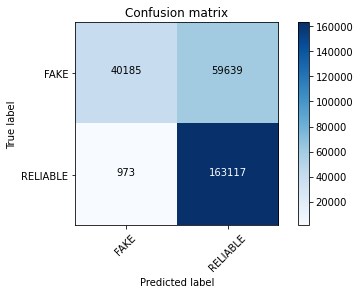

In [23]:
plot_confusion_matrix(cm, classes=['FAKE', 'RELIABLE'])

In [9]:
from sklearn.linear_model import SGDClassifier
svm_model = Pipeline([('tfidf', TfidfVectorizer()), ('svm', SGDClassifier(loss='hinge', alpha=1e-3, penalty='l2', random_state=42))])
svm_model = svm_model.fit(X_train, Y_train)

In [13]:
from sklearn import metrics

svm_pred = svm_model.predict(X_test)
svm_score = metrics.accuracy_score(Y_test, svm_pred)
print("Accuracy: ", svm_score)
svm_cm = metrics.confusion_matrix(Y_test, svm_pred)
svm_cm
# plot_confusion_matrix(svm_cm, classes=['FAKE', 'RELIABLE'])

Accuracy:  0.7660639450730162


array([[ 38325,  61499],
       [   240, 163850]], dtype=int64)

Confusion matrix, without normalization


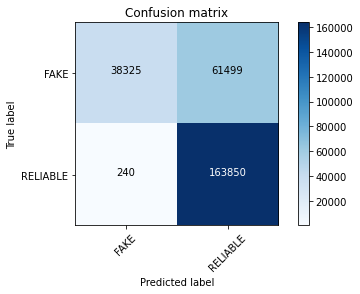

In [19]:
plot_confusion_matrix(svm_cm, classes=['FAKE', 'RELIABLE'])

# SVM with TF-IDF Vectorizer with Passive Aggresive Classifier

In [14]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_model = Pipeline([('tfidf', TfidfVectorizer()), ('passive_aggressive', PassiveAggressiveClassifier(n_iter_no_change=50))])

In [15]:
pa_model.fit(X_train, Y_train)
pa_pred = pa_model.predict(X_test)
pa_score = metrics.accuracy_score(Y_test, pa_pred)
print("Accuracy: ", pa_score)
pa_cm = metrics.confusion_matrix(Y_test, pa_pred)
pa_cm
# plot_confusion_matrix(pa_cm, classes=['FAKE', 'RELIABLE'])

Accuracy:  0.8844093151556947


array([[ 84307,  15517],
       [ 14989, 149101]], dtype=int64)

Confusion matrix, without normalization


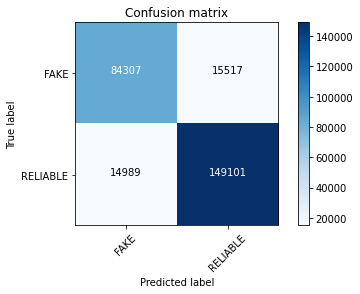

In [18]:
plot_confusion_matrix(pa_cm, classes=['FAKE', 'RELIABLE'])

## Modifying TF-IDF Vectorizer parameters (max_features=5000,ngram_range=(1,2))

In [25]:
pa_model_test1 = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,2))), ('passive_aggressive', PassiveAggressiveClassifier(n_iter_no_change=50))])

Accuracy:  0.8821851057541472
Confusion matrix, without normalization


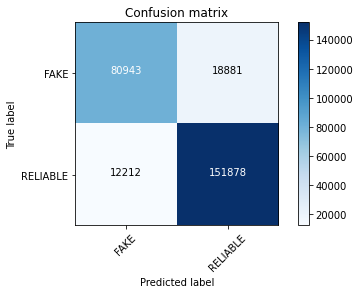

In [26]:
pa_model_test1.fit(X_train, Y_train)
pa_pred_test1 = pa_model_test1.predict(X_test)
pa_score_test1 = metrics.accuracy_score(Y_test, pa_pred_test1)
print("Accuracy: ", pa_score_test1)
pa_cm_test1 = metrics.confusion_matrix(Y_test, pa_pred_test1)
plot_confusion_matrix(pa_cm_test1, classes=['FAKE', 'RELIABLE'])

## Modifying TF-IDF Vectorizer parameters (max_features=5000,ngram_range=(1,1))

In [27]:
pa_model_test2 = Pipeline([('tfidf', TfidfVectorizer(max_features=5000)), ('passive_aggressive', PassiveAggressiveClassifier(n_iter_no_change=50))])

Accuracy:  0.8421379691869321
Confusion matrix, without normalization


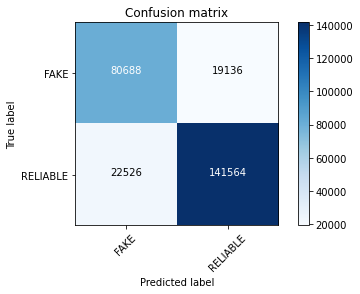

In [28]:
pa_model_test2.fit(X_train, Y_train)
pa_pred_test2 = pa_model_test2.predict(X_test)
pa_score_test2 = metrics.accuracy_score(Y_test, pa_pred_test2)
print("Accuracy: ", pa_score_test2)
pa_cm_test2 = metrics.confusion_matrix(Y_test, pa_pred_test2)
plot_confusion_matrix(pa_cm_test2, classes=['FAKE', 'RELIABLE'])

## (BEST TFIDF) Modifying TF-IDF Vectorizer parameters for content (ngram_range=(1,2))

In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_model_test3 = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))), ('passive_aggressive', PassiveAggressiveClassifier(n_iter_no_change=50))])

Accuracy:  0.9449858666080617
Confusion matrix, without normalization


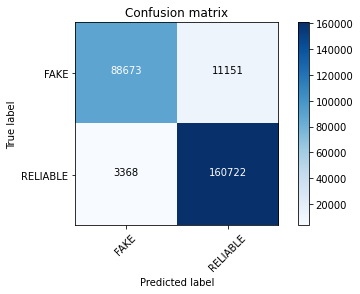

In [11]:
from sklearn import metrics

pa_model_test3.fit(X_train, Y_train)
pa_pred_test3 = pa_model_test3.predict(X_test)
pa_score_test3 = metrics.accuracy_score(Y_test, pa_pred_test3)
print("Accuracy: ", pa_score_test3)
pa_cm_test3 = metrics.confusion_matrix(Y_test, pa_pred_test3)
plot_confusion_matrix(pa_cm_test3, classes=['FAKE', 'RELIABLE'])

# Saving the model

In [15]:
import pickle

filename = 'combined_content_pa_model.sav'
pickle.dump(pa_model_test3, open(filename, 'wb'))

print("Done saving model")